In [64]:
import numpy as np
import pandas as pd
from pandas import plotting

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# for interactive visualizations
##import plotly.offline as py
#from plotly.offline import init_notebook_mode, iplot
#import plotly.graph_objs as go
#from plotly import tools
#init_notebook_mode(connected = True)
#import plotly.figure_factory as ff

# for path
import os
#print(os.listdir('../input/'))

In [65]:
# importing the dataset
data = pd.read_csv('Tenovia- Data Set for -Customers.csv')

data.head()

#py.iplot(dat)

,CustomerID,Gender,Age,Annual Income (INR),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [66]:
data.isnull().values.any()

False

In [67]:
data.describe()
#py.iplot(desc)

,CustomerID,Age,Annual Income (INR),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


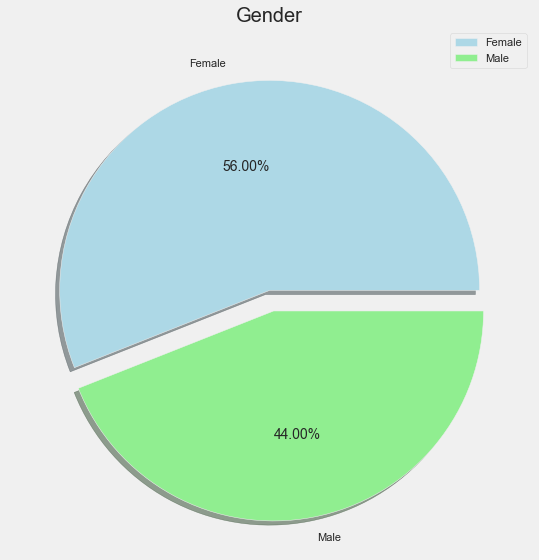

In [68]:
labels = ['Female', 'Male']
size = data['Gender'].value_counts()
colors = ['lightblue','lightgreen']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True ,autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

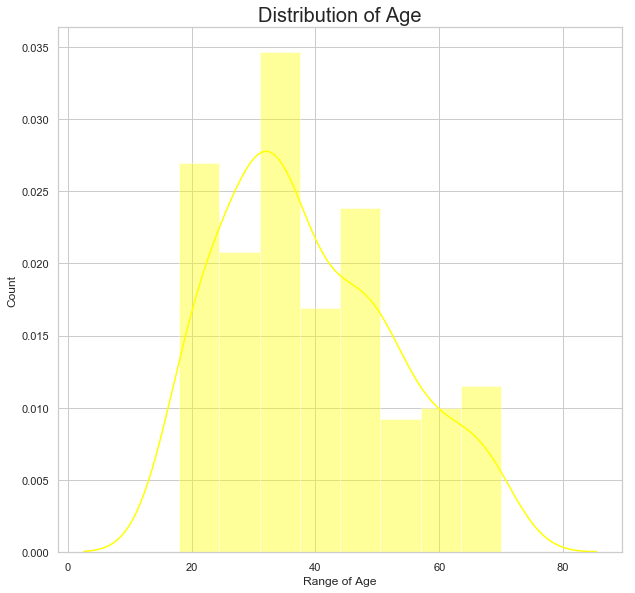

In [69]:
import warnings
warnings.filterwarnings('ignore')

sns.set(style = 'whitegrid')
sns.distplot(data['Age'], color = 'yellow')
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')

plt.show()

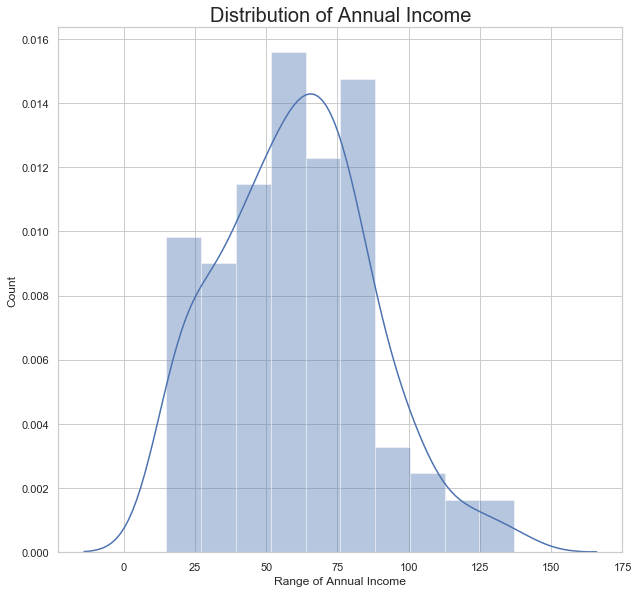

In [70]:
import warnings
warnings.filterwarnings('ignore')

#plt.rcParams['figure.figsize'] = (18, 8)

sns.set(style = 'whitegrid')
sns.distplot(data['Annual Income (INR)'])
plt.title('Distribution of Annual Income', fontsize = 20)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')

plt.show()

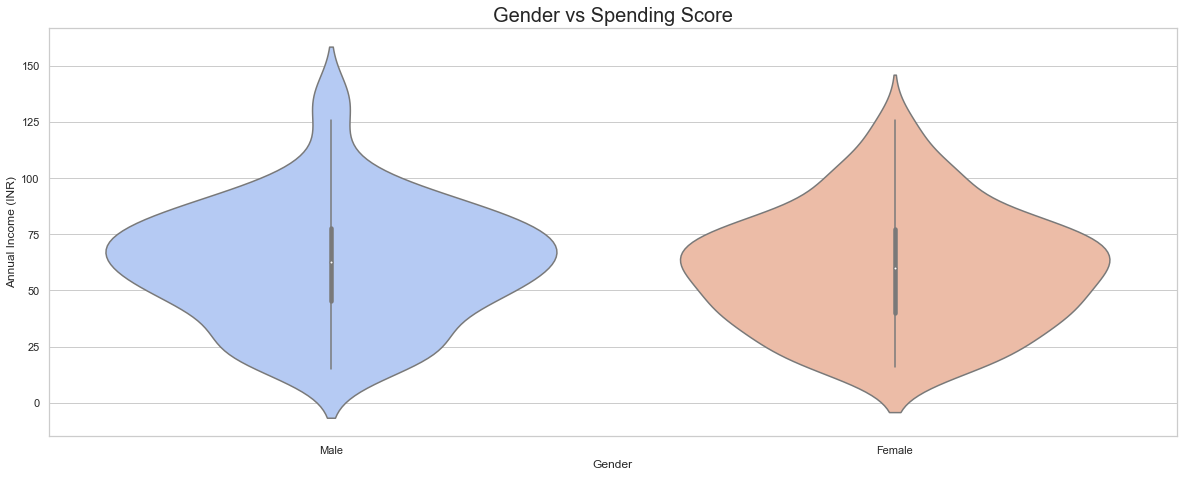

In [71]:
plt.rcParams['figure.figsize'] = (18, 7)
sns.violinplot(data['Gender'], data['Annual Income (INR)'], palette = 'coolwarm')
plt.title('Gender vs Spending Score', fontsize = 20)
plt.show()

## Clustering Analysis

In [72]:
x = data.iloc[:, [3, 4]].values

# let's check the shape of x
print(x.shape)

(200, 2)


In [73]:
from sklearn.cluster import KMeans
k=[]
for i in range (1,11):
    model=KMeans(n_clusters=i)
    model.fit(x)
    k.append(model.inertia_)

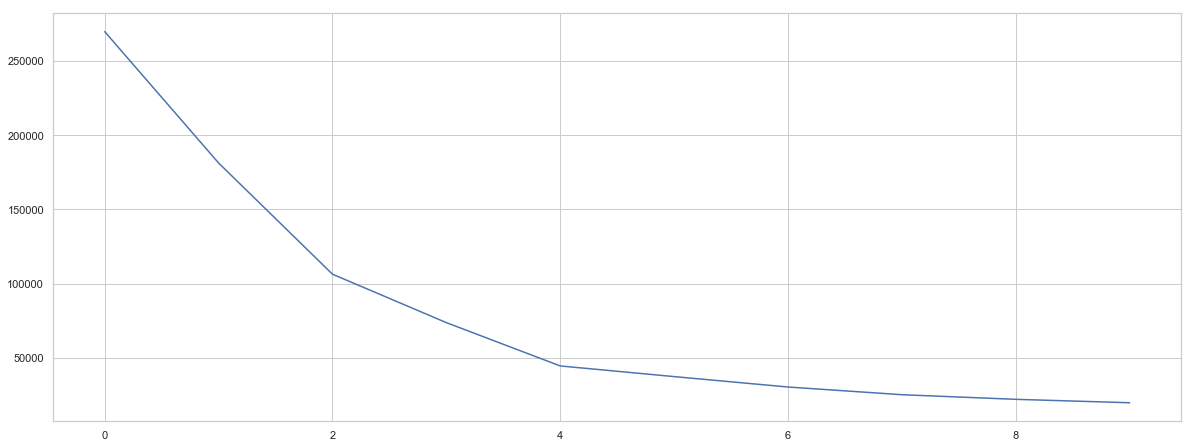

In [74]:
plt.grid('on')
plt.plot(k)
plt.show()

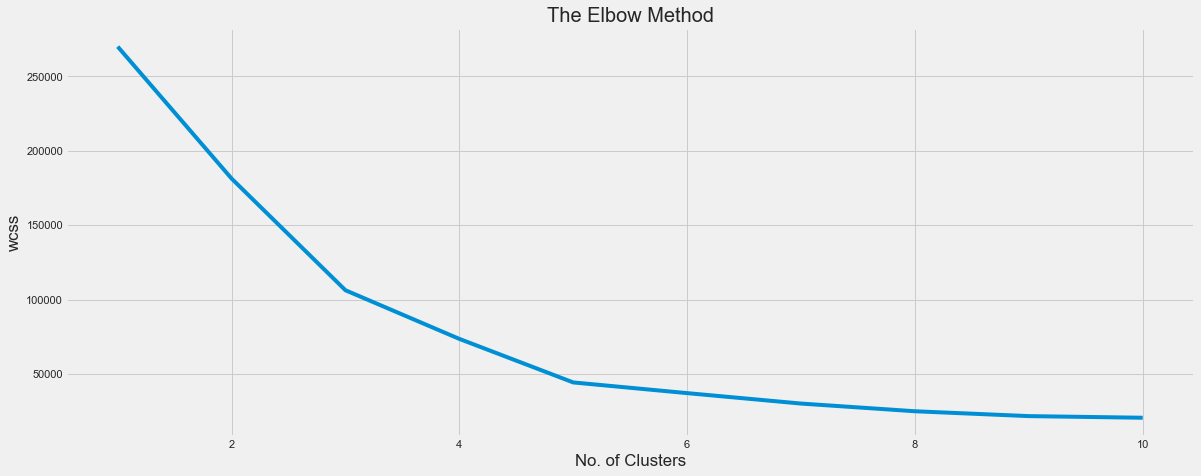

In [83]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

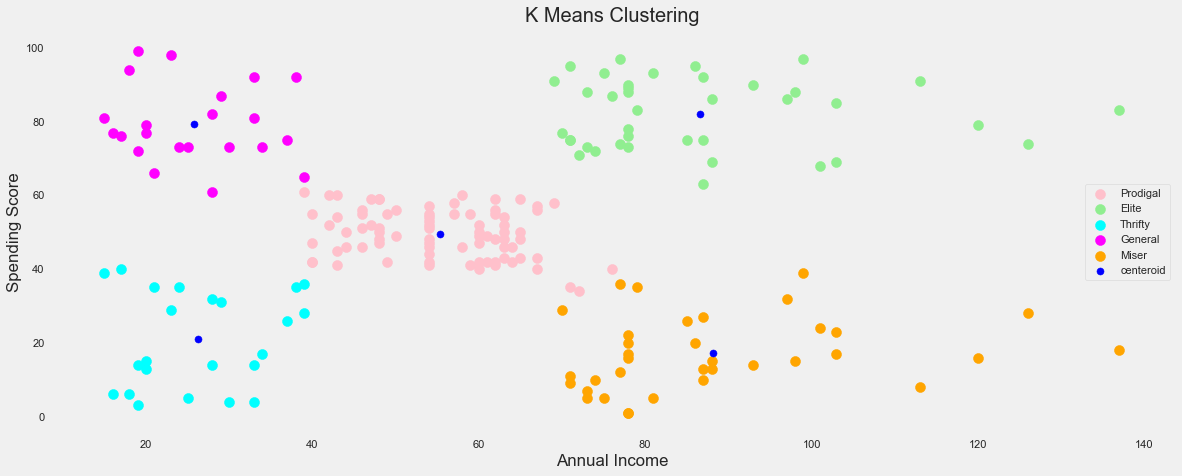

In [87]:
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 3)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink',label='Prodigal')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'lightgreen',label='Elite')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan',label='Thrifty')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta',label='General')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'orange',label='Miser')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()